In [391]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import seaborn as sns
from scipy import stats
# from mpl_toolkits.basemap import Basemap



In [392]:
df = pd.read_table("SouthCalifornia-1982-2011.dat",sep=" ")
# col= ['index','p_index', 'time', 'magnitude','latitude' ,'longitude','depth']
columns = ["Index", "Previous", "Time", "Magnitude", "X", "Y", "Z"]

df.columns= columns
df

,Index,Previous,Time,Magnitude,X,Y,Z
0,1,0,3.650139e+04,2.12,-2363740,-4787011,3461373
1,2,0,3.748828e+04,2.33,-2363746,-4786942,3461232
2,3,0,4.798252e+04,2.57,-2475085,-4664024,3548479
3,4,0,6.026857e+04,2.98,-2238642,-4839098,3469546
4,5,0,1.006128e+05,2.04,-2545592,-4588519,3597315
...,...,...,...,...,...,...,...
110265,110266,-1,9.304996e+08,2.60,-2668492,-4335735,3810743
110266,110267,-1,9.305115e+08,2.02,-2297480,-4823870,3445285
110267,110268,-1,9.305318e+08,2.00,-2404797,-4441247,3868121
110268,110269,-1,9.305363e+08,2.17,-2388375,-4691191,3550903


# Q3 . Computing the Distribution of Distance

### Computing Distance from Given Cartesian Coordinates


The formula that is used to calculate the distance is  $ Di,i-1 = \sqrt{(Xi-Xi-1)^2+(Yi-Yi-1)^2+(Zi-Zi-1))^2}$ , According to required solution, we were asked to compute the distance two events, the current index and the following one, so with the help of diff command we obtained the distance between two instances. Following is the refrence that used to find distance for Hypocenter.

1.https://gfzpublic.gfz-potsdam.de/rest/items/item_43361/component/file_816919/content


In [393]:
# Just to make sure to sort the data according to time
df = df.sort_values(by=['Time'])


In [384]:
# Computing the distance
# df_mag1 = df_complete.copy()
df_mag1 = df.copy()

df_mag1['distance'] = np.sqrt((df_mag1['X'].diff(periods=-1))**2 + (df_mag1['Y'].diff(periods=-1))**2 + (df_mag1['Z'].diff(periods=-1))**2)
# df_mag
df_mag1.dropna() # Droping Null Values


,Index,Previous,Time,Magnitude,X,Y,Z,distance
0,1,0,3.650139e+04,2.12,-2363740,-4787011,3461373,157.092330
1,2,0,3.748828e+04,2.33,-2363746,-4786942,3461232,187395.962214
2,3,0,4.798252e+04,2.57,-2475085,-4664024,3548479,304608.956227
3,4,0,6.026857e+04,2.98,-2238642,-4839098,3469546,416332.865748
4,5,0,1.006128e+05,2.04,-2545592,-4588519,3597315,262319.501999
...,...,...,...,...,...,...,...,...
110264,110265,110250,9.304962e+08,2.08,-2365328,-4779270,3463333,639785.444677
110265,110266,-1,9.304996e+08,2.60,-2668492,-4335735,3810743,713782.342268
110266,110267,-1,9.305115e+08,2.02,-2297480,-4823870,3445285,580265.095895
110267,110268,-1,9.305318e+08,2.00,-2404797,-4441247,3868121,404189.243726


Setting Value of Magnitue (m)

In [394]:
# setting the values of magnitude

mag = 2.50

df_mag1 = df_mag1[df_mag1['Magnitude']>=mag]

# df_mag.shape

print("There are total",df_mag.shape[0],"Earthquake Having Magnitue >= ",mag)

There are total 39179 Earthquake Having Magnitue >=  2.5


### Maximum , Minimum and Average Distance effected by Earthquakes

In [395]:
print("\033[1m" +"Maximum : " +"\033[0m", np.max(df_mag1['distance']),"m")
print("Minimum :", np.min(df_mag1['distance']),"m")
print("\nAverage :", np.mean(df_mag1['distance']),"m")


row = df_mag1.loc[df_mag1['distance'] == np.max(df_mag1['distance'])]
# row

Maximum :  893757.6099916577 m
Minimum : 1.7320508075688772 m

Average : 149366.71629462802 m


# Plotting Histogram
The aim to plot the histogram is to check which kind of distribution it is so we will be able to figure about the structure of data and later to find the solution that best fit the data.

After Ploting histogram we have seen that the data is Right-Skewed and that forces us to use loglog bining and applying to PowerLaw to better visualize the data.

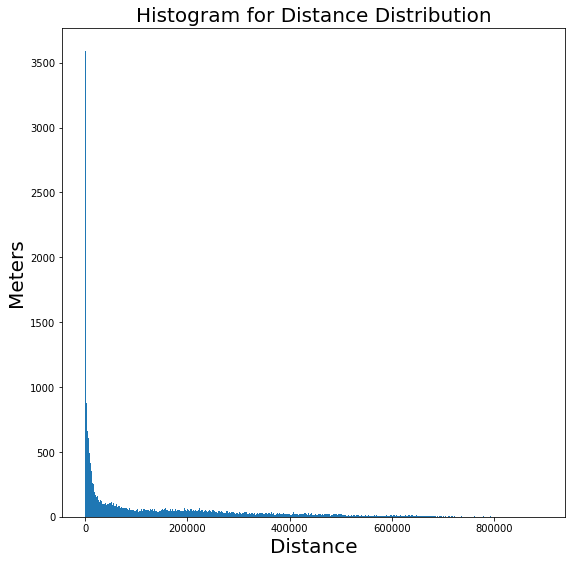

In [396]:
# Ploting the data on histogram
bin1=1000 # More Value of bin Creating more noise in order to generate more noise

fig , ax = plt.subplots(figsize=(9,9))
h_dis , bins_dis , _ = ax.hist(df_mag1['distance'], bins=bin1)
ax.set_title('Histogram for Distance Distribution', fontsize=20)
ax.set_xlabel('Distance', fontsize=20)
ax.set_ylabel('Meters', fontsize=20)
plt.show()
plt.close()



### Mapping the Data into Loglog scale
As Discuss Above the Distribution of Distance is not Gaussian (Normal), for this purpose to, to extract the meaningful data it is necessary to map the data into loglog scale.

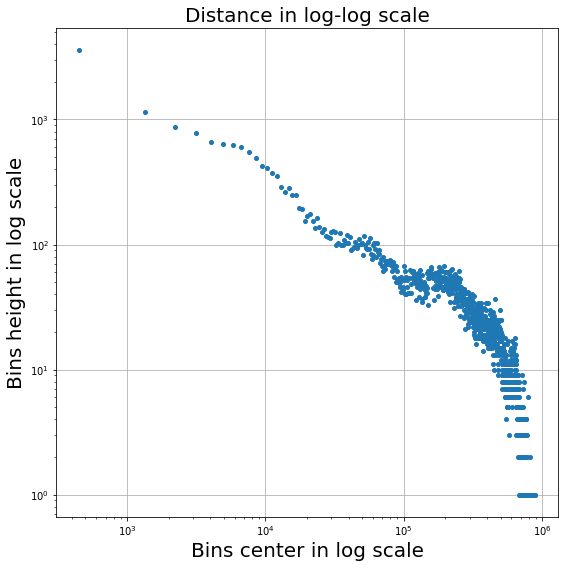

In [397]:
bin_center = (bins_dis[1:] + bins_dis[:-1])*0.5 
fig, ax = plt.subplots(figsize=(9,9))
ax.loglog(bin_center, h_dis, 'o', markersize = 4)
# ax.plot(bin_center, h_dis, '.')
ax.set_title('Distance in log-log scale', fontsize=20)
ax.set_xlabel('Bins center in log scale', fontsize=20)
ax.set_ylabel('Bins height in log scale', fontsize=20)
ax.grid()
plt.show()


In [406]:
#We consider the starting point value as lower than 10^2 which is approximately -0.9 
#and we are going to start the bin from here

h_log_bin = h_dis[h_dis>200]
bin_log = bins_dis[0:len(h_log_bin)+1]

#Removed the noisy tail as suggested in the paper

bin_log = list(bin_log)
curr_bin = bin_log[-1]  

# we start by the last bin (with regular binning) and we add the correct bin size, depending on the region 
# we are considering

print("Starting Bining Point: ", curr_bin)

while curr_bin < np.max(df_mag1['distance']): 
#     if (curr_bin < 10):
#         curr_bin += 1
#     elif (curr_bin < 100):
#         curr_bin += 10
    if (curr_bin < 1000):
        curr_bin += 100
    elif (curr_bin < 10000):
        curr_bin += 1000
    elif (curr_bin < 100000):
        curr_bin += 10000
    elif (curr_bin >= 100000):
        curr_bin += 100000
    bin_log.append(curr_bin)

# print("\nSet of logarithmic bins:\n", [round(b, 1) for b in bins_logbinning3])


Starting Bining Point:  16983.093731683723


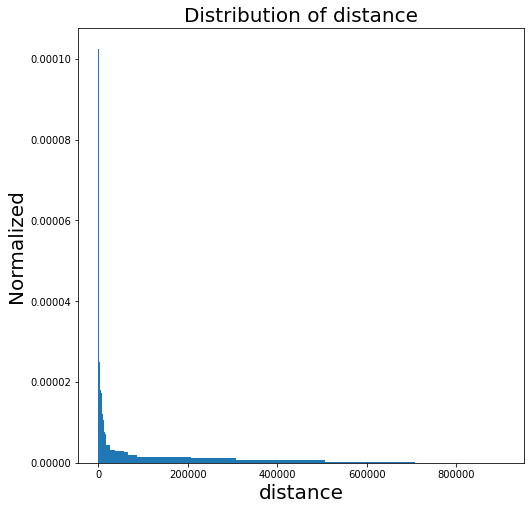

In [409]:
fig, ax = plt.subplots(figsize=(8,8))
h3log, bins3log, _ = ax.hist(df_mag1['distance'], bins=bin_log, density=True)
ax.set_title('Distribution of distance', fontsize=20)
ax.set_xlabel('distance', fontsize=20)
ax.set_ylabel('Normalized', fontsize=20)
plt.show()



In [412]:
cen_log = (bins3log[1:] + bins3log[:-1])*0.5
# fig, ax = plt.subplots(figsize=(8,8))

# ax.scatter(cen_log, h3log)
# ax.set_title('log-log scale of Converted Distance', fontsize=20)
# ax.set_xlabel('Center of Bin', fontsize=20)
# ax.set_ylabel('Normalized (Distance)', fontsize=20)
# ax.grid()
# plt.show()

## LINEAR REGRESSION
According to required, as we have obtained the distribution , for Fitting function we applied the linear regression to get more accurate result and to be more sure.
According to documentation, suggested above, we have found that correlation cofficient, more close to one better the fitted result. So in this case we have obtained amost 98% of accuracy.

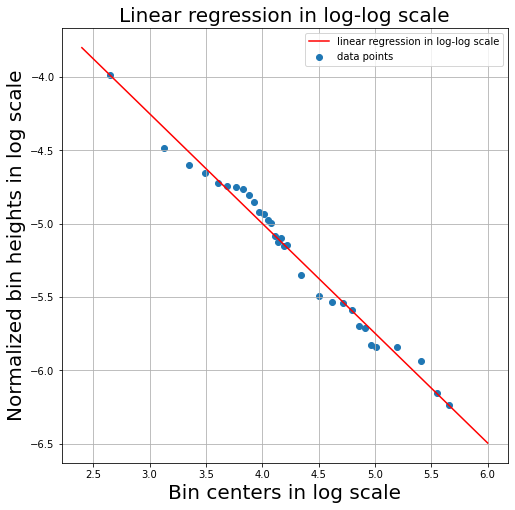

Slope:  -0.7488683020169246
Intercept:  -2.0022020237659444
Regression Coef:  -0.9913060912911978
Correlation Coef:  0.9826877666310326


In [413]:
#rempving Noisy point that can be shown in Graph
x = cen_log[0:-4]
y = h3log[0:-4]

#Applying Linear Regression
slope, intercept, r, p, se = stats.linregress(np.log10(x), np.log10(y))
xax = np.linspace(2.4,6)

fig,ax = plt.subplots(figsize=(8,8))

ax.scatter(np.log10(x), np.log10(y), label='data points')
ax.plot(xax, xax*slope + intercept, c = 'red', label='linear regression in log-log scale')
ax.set_title('Linear regression in log-log scale', fontsize=20)
ax.set_xlabel('Bin centers in log scale', fontsize=20)
ax.set_ylabel('Normalized bin heights in log scale', fontsize=20)
ax.legend()
ax.grid()
plt.show()

print("Slope: ", slope)
print("Intercept: ", intercept)
print("Regression Coef: ", r)  
print("Correlation Coef: ", r**2) 

## Applying Powerlaw 
As discribed in the paper the PowerLaw is $ Cx-^a $, So we applying on the loglog scale distance

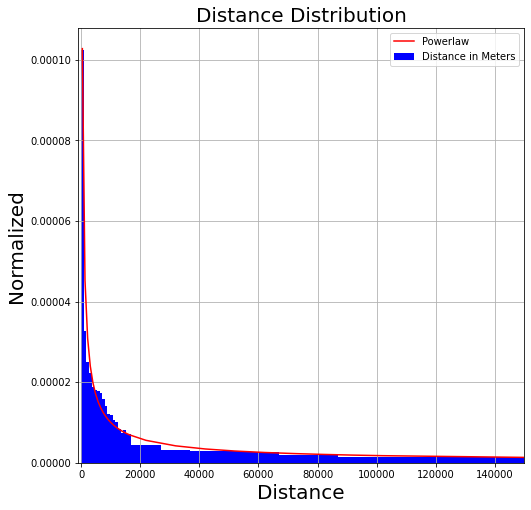

In [414]:
def powerlaw(x, C, a):
    return C*(x**-a)

fig, ax2 = plt.subplots(figsize=(8,8))
h, bins,_ = ax2.hist(df_mag1['distance'], bins=bin_log, density=True, color='blue',
                     label='Distance in Meters')
ax2.plot(x, powerlaw(x, 10**intercept, -slope), color='red', label='Powerlaw')
ax2.set_xlim(-1000, 150000)
ax2.set_title('Distance Distribution', fontsize=20)
ax2.set_xlabel('Distance', fontsize=20)
ax2.set_ylabel('Normalized', fontsize=20)
ax2.legend()
ax2.grid()
plt.show()

## Different values of Magnitude (m =  3, 3.5, 4)
We have analyze that, with increase in magnitude the less number of earthquake has been observed, for this purpose when ploting histogram, Bin size for each specific magnitude require special handling, more magnitude less number of bins are needed, that can be seen in the graphs below.

There are total 11923 Earthquake Having Magnitue >=  3


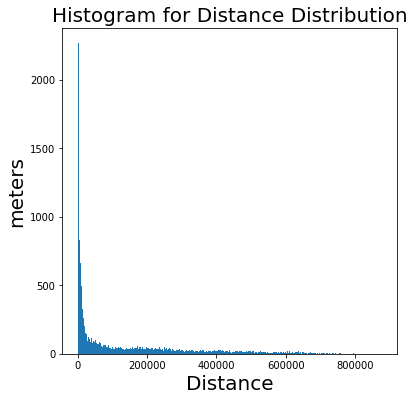

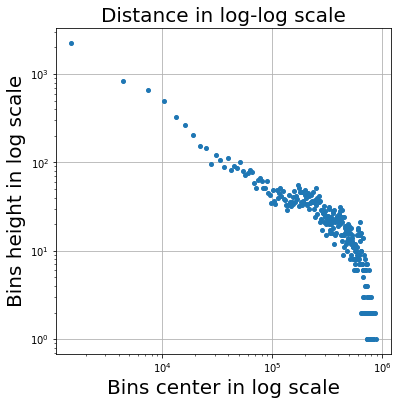

Starting Bining Point:  20481.305064164873


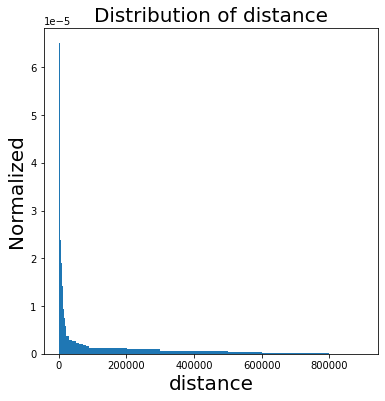

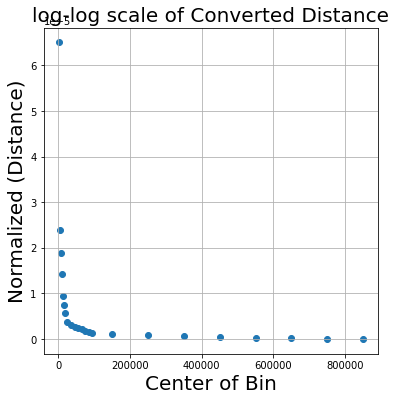

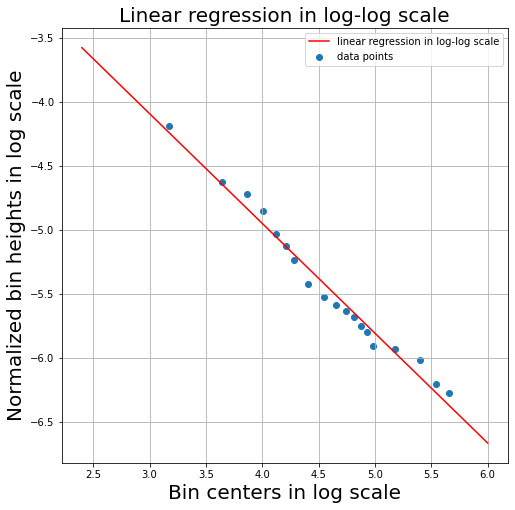

Slope:  -0.8592096588289819
Intercept:  -1.512122022094752
Regression Coef:  -0.9899104663123776
Correlation Coef:  0.9799227313147888


In [415]:
# setting the values of magnitude
df_mag4 = df.copy()

df_mag4['distance'] = np.sqrt((df_mag4['X'].diff(periods=-1))**2 + (df_mag4['Y'].diff(periods=-1))**2 + (df_mag4['Z'].diff(periods=-1))**2)
df_mag4.dropna() # Droping Null Values

mag1=3
df_mag4 = df_mag4[df_mag4['Magnitude']>=mag1]
print("There are total",df_mag4.shape[0],"Earthquake Having Magnitue >= ",mag1)
# Ploting the data on histogram
bin2=300 # More Value of bin Creating more noise in order to generate more noise

fig , ax = plt.subplots(figsize=(6,6))
h_dis , bins_dis , _ = ax.hist(df_mag4['distance'], bins=bin2)
ax.set_title('Histogram for Distance Distribution', fontsize=20)
ax.set_xlabel('Distance', fontsize=20)
ax.set_ylabel('meters', fontsize=20)
plt.show()
plt.close()


bin_center = (bins_dis[1:] + bins_dis[:-1])*0.5
fig, ax = plt.subplots(figsize=(6,6))
ax.loglog(bin_center, h_dis, 'o', markersize = 4)
ax.set_title('Distance in log-log scale', fontsize=20)
ax.set_xlabel('Bins center in log scale', fontsize=20)
ax.set_ylabel('Bins height in log scale', fontsize=20)
ax.grid()
plt.show()


h_log_bin = h_dis[h_dis>200]
bin_log = bins_dis[0:len(h_log_bin)+1]
bin_log = list(bin_log)
curr_bin = bin_log[-1]  
print("Starting Bining Point: ", curr_bin)

while curr_bin < np.max(df_mag1['distance']): 
#     if (curr_bin < 10):
#         curr_bin += 1
#     elif (curr_bin < 100):
#         curr_bin += 10
    if (curr_bin < 1000):
        curr_bin += 100
    elif (curr_bin < 10000):
        curr_bin += 1000
    elif (curr_bin < 100000):
        curr_bin += 10000
    elif (curr_bin >= 100000):
        curr_bin += 100000
    bin_log.append(curr_bin)

# print("\nSet of logarithmic bins:\n", [round(b, 1) for b in bins_logbinning3])


fig, ax = plt.subplots(figsize=(6,6))
h3log, bins3log, _ = ax.hist(df_mag4['distance'], bins=bin_log, density=True)
ax.set_title('Distribution of distance', fontsize=20)
ax.set_xlabel('distance', fontsize=20)
ax.set_ylabel('Normalized', fontsize=20)
plt.show()


cen_log = (bins3log[1:] + bins3log[:-1])*0.5
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(cen_log, h3log)
ax.set_title('log-log scale of Converted Distance', fontsize=20)
ax.set_xlabel('Center of Bin', fontsize=20)
ax.set_ylabel('Normalized (Distance)', fontsize=20)
ax.grid()
plt.show()



#rempving Noisy point that can be shown in Graph
x = cen_log[0:-4]
y = h3log[0:-4]

#Applying Linear Regression
slope, intercept, r, p, se = stats.linregress(np.log10(x), np.log10(y))
xax = np.linspace(2.4,6)

fig,ax = plt.subplots(figsize=(8,8))

ax.scatter(np.log10(x), np.log10(y), label='data points')
ax.plot(xax, xax*slope + intercept, c = 'red', label='linear regression in log-log scale')
ax.set_title('Linear regression in log-log scale', fontsize=20)
ax.set_xlabel('Bin centers in log scale', fontsize=20)
ax.set_ylabel('Normalized bin heights in log scale', fontsize=20)
ax.legend()
ax.grid()
plt.show()

print("Slope: ", slope)
print("Intercept: ", intercept)
print("Regression Coef: ", r)  
print("Correlation Coef: ", r**2) 

## Magnitude (m) = 3.5

There are total 3638 Earthquake Having Magnitue >=  3.5


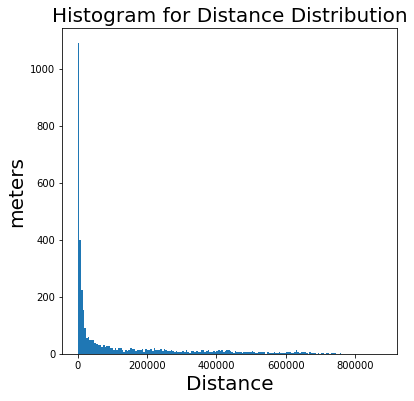

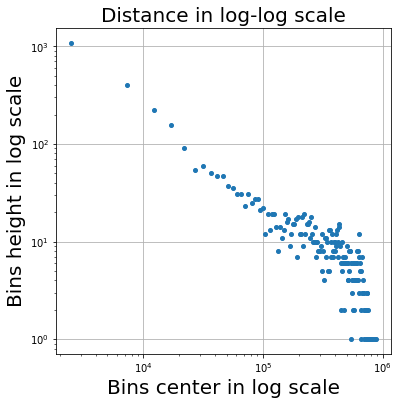

Starting Bining Point:  14674.865175747294


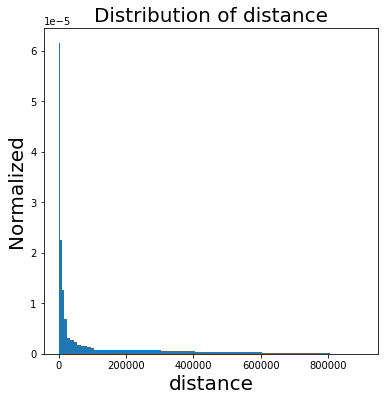

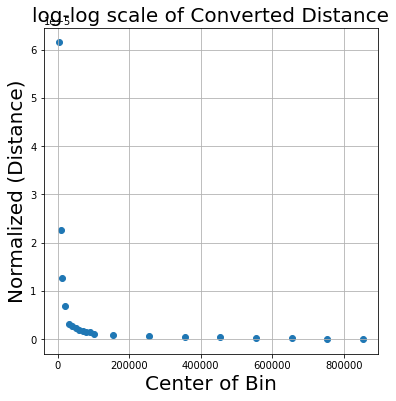

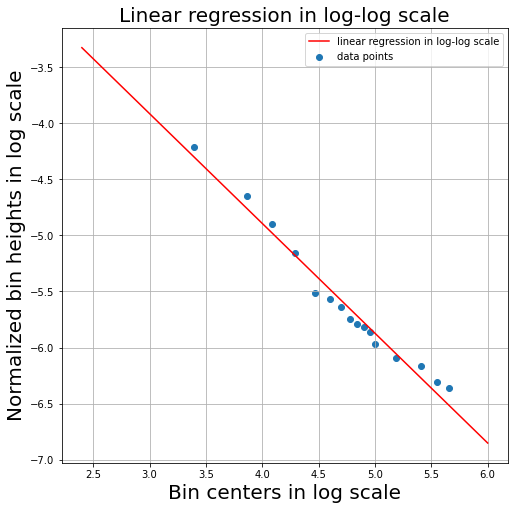

Slope:  -0.979569462870164
Intercept:  -0.9744013267387661
Regression Coef:  -0.9872848332326686
Correlation Coef:  0.9747313419312582


In [416]:


mag1=3.5
df_mag4 = df_mag4[df_mag4['Magnitude']>=mag1]
print("There are total",df_mag4.shape[0],"Earthquake Having Magnitue >= ",mag1)
# Ploting the data on histogram
bin2=180 # More Value of bin Creating more noise in order to generate more noise

fig , ax = plt.subplots(figsize=(6,6))
h_dis , bins_dis , _ = ax.hist(df_mag4['distance'], bins=bin2)
ax.set_title('Histogram for Distance Distribution', fontsize=20)
ax.set_xlabel('Distance', fontsize=20)
ax.set_ylabel('meters', fontsize=20)
plt.show()
plt.close()


bin_center = (bins_dis[1:] + bins_dis[:-1])*0.5
fig, ax = plt.subplots(figsize=(6,6))
ax.loglog(bin_center, h_dis, 'o', markersize = 4)
ax.set_title('Distance in log-log scale', fontsize=20)
ax.set_xlabel('Bins center in log scale', fontsize=20)
ax.set_ylabel('Bins height in log scale', fontsize=20)
ax.grid()
plt.show()


h_log_bin = h_dis[h_dis>200]
bin_log = bins_dis[0:len(h_log_bin)+1]
bin_log = list(bin_log)
curr_bin = bin_log[-1]  
print("Starting Bining Point: ", curr_bin)

while curr_bin < np.max(df_mag1['distance']): 
#     if (curr_bin < 10):
#         curr_bin += 1
#     elif (curr_bin < 100):
#         curr_bin += 10
    if (curr_bin < 1000):
        curr_bin += 100
    elif (curr_bin < 10000):
        curr_bin += 1000
    elif (curr_bin < 100000):
        curr_bin += 10000
    elif (curr_bin >= 100000):
        curr_bin += 100000
    bin_log.append(curr_bin)

# print("\nSet of logarithmic bins:\n", [round(b, 1) for b in bins_logbinning3])


fig, ax = plt.subplots(figsize=(6,6))
h3log, bins3log, _ = ax.hist(df_mag4['distance'], bins=bin_log, density=True)
ax.set_title('Distribution of distance', fontsize=20)
ax.set_xlabel('distance', fontsize=20)
ax.set_ylabel('Normalized', fontsize=20)
plt.show()


cen_log = (bins3log[1:] + bins3log[:-1])*0.5
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(cen_log, h3log)
ax.set_title('log-log scale of Converted Distance', fontsize=20)
ax.set_xlabel('Center of Bin', fontsize=20)
ax.set_ylabel('Normalized (Distance)', fontsize=20)
ax.grid()
plt.show()


#rempving Noisy point that can be shown in Graph
x = cen_log[0:-4]
y = h3log[0:-4]

#Applying Linear Regression
slope, intercept, r, p, se = stats.linregress(np.log10(x), np.log10(y))
xax = np.linspace(2.4,6)

fig,ax = plt.subplots(figsize=(8,8))

ax.scatter(np.log10(x), np.log10(y), label='data points')
ax.plot(xax, xax*slope + intercept, c = 'red', label='linear regression in log-log scale')
ax.set_title('Linear regression in log-log scale', fontsize=20)
ax.set_xlabel('Bin centers in log scale', fontsize=20)
ax.set_ylabel('Normalized bin heights in log scale', fontsize=20)
ax.legend()
ax.grid()
plt.show()

print("Slope: ", slope)
print("Intercept: ", intercept)
print("Regression Coef: ", r)  
print("Correlation Coef: ", r**2) 

## Magnitude (m) = 4

There are total 1133 Earthquake Having Magnitue >=  4


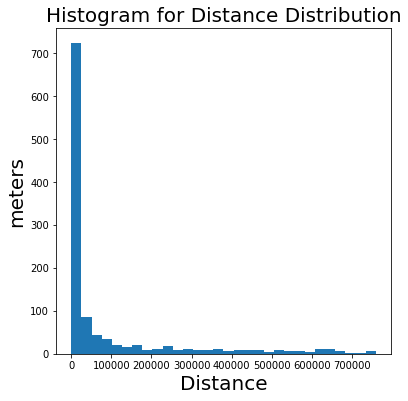

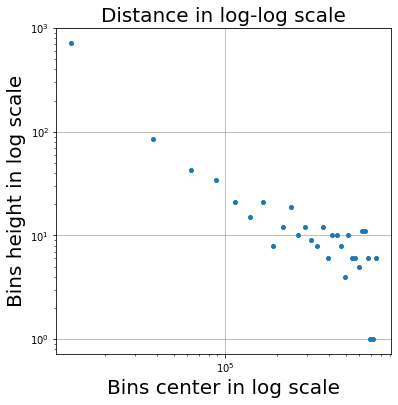

Starting Bining Point:  25383.196206256172


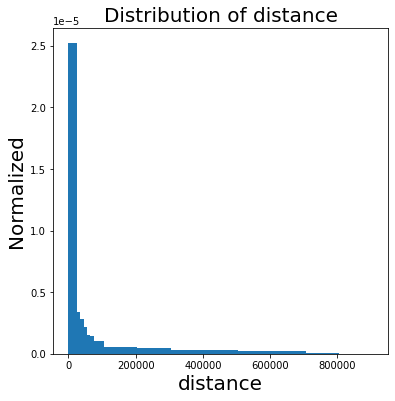

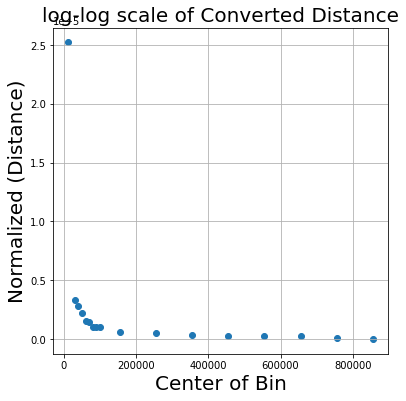

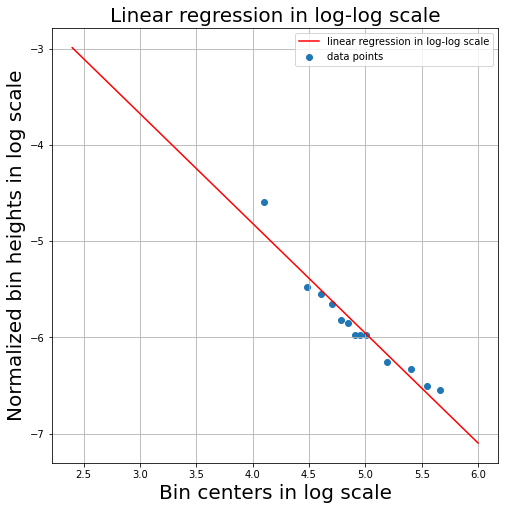

Slope:  -1.1406990556770782
Intercept:  -0.253381210823834
Regression Coef:  -0.9659164518423959
Correlation Coef:  0.9329945919398036


In [417]:
 
mag1=4
df_mag4 = df_mag4[df_mag4['Magnitude']>=mag1]
print("There are total",df_mag4.shape[0],"Earthquake Having Magnitue >= ",mag1)
# Ploting the data on histogram
bin2=30 # More Value of bin Creating more noise in order to generate more noise

fig , ax = plt.subplots(figsize=(6,6))
h_dis , bins_dis , _ = ax.hist(df_mag4['distance'], bins=bin2)
ax.set_title('Histogram for Distance Distribution', fontsize=20)
ax.set_xlabel('Distance', fontsize=20)
ax.set_ylabel('meters', fontsize=20)
plt.show()
plt.close()


bin_center = (bins_dis[1:] + bins_dis[:-1])*0.5
fig, ax = plt.subplots(figsize=(6,6))
ax.loglog(bin_center, h_dis, 'o', markersize = 4)
ax.set_title('Distance in log-log scale', fontsize=20)
ax.set_xlabel('Bins center in log scale', fontsize=20)
ax.set_ylabel('Bins height in log scale', fontsize=20)
ax.grid()
plt.show()


h_log_bin = h_dis[h_dis>200]
bin_log = bins_dis[0:len(h_log_bin)+1]
bin_log = list(bin_log)
curr_bin = bin_log[-1]  
print("Starting Bining Point: ", curr_bin)

while curr_bin < np.max(df_mag1['distance']): 
#     if (curr_bin < 10):
#         curr_bin += 1
#     elif (curr_bin < 100):
#         curr_bin += 10
    if (curr_bin < 1000):
        curr_bin += 100
    elif (curr_bin < 10000):
        curr_bin += 1000
    elif (curr_bin < 100000):
        curr_bin += 10000
    elif (curr_bin >= 100000):
        curr_bin += 100000
    bin_log.append(curr_bin)

# print("\nSet of logarithmic bins:\n", [round(b, 1) for b in bins_logbinning3])


fig, ax = plt.subplots(figsize=(6,6))
h3log, bins3log, _ = ax.hist(df_mag4['distance'], bins=bin_log, density=True)
ax.set_title('Distribution of distance', fontsize=20)
ax.set_xlabel('distance', fontsize=20)
ax.set_ylabel('Normalized', fontsize=20)
plt.show()

cen_log = (bins3log[1:] + bins3log[:-1])*0.5
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(cen_log, h3log)
ax.set_title('log-log scale of Converted Distance', fontsize=20)
ax.set_xlabel('Center of Bin', fontsize=20)
ax.set_ylabel('Normalized (Distance)', fontsize=20)
ax.grid()
plt.show()


#rempving Noisy point that can be shown in Graph
x = cen_log[0:-4]
y = h3log[0:-4]

#Applying Linear Regression
slope, intercept, r, p, se = stats.linregress(np.log10(x), np.log10(y))
xax = np.linspace(2.4,6)

fig,ax = plt.subplots(figsize=(8,8))

ax.scatter(np.log10(x), np.log10(y), label='data points')
ax.plot(xax, xax*slope + intercept, c = 'red', label='linear regression in log-log scale')
ax.set_title('Linear regression in log-log scale', fontsize=20)
ax.set_xlabel('Bin centers in log scale', fontsize=20)
ax.set_ylabel('Normalized bin heights in log scale', fontsize=20)
ax.legend()
ax.grid()
plt.show()

print("Slope: ", slope)
print("Intercept: ", intercept)
print("Regression Coef: ", r)  
print("Correlation Coef: ", r**2) 